# Introduction

The linear systems assignment consists of 6 exercises.





To pass the assignment you have to correctly solve exercise 1 to 5 and to do a small research task to solve exercise 6 (research part)

*   Save a copy of this file and change the XXYYZZ numbers with your AUID
*   Upload this file into BS (as a .ipynb notebook file)
*   Upload a pdf version of this notebook into BS
  * On colab you can do that by clicking: File->Print
  * Make sure **all the cell results you ran are visible** in the pdf


You can make a copy of this notebook and solve it in that or you can create a new notebook from scratch.

You can use a LOT of the material from the lecture notebooks and previous exercises to solve it.

In [9]:
import numpy as np
import sympy as sp
import scipy as sci
import matplotlib.pyplot as plt

# Exercise 1

1. Create the 4x4 identity matrix, I4.

In [10]:
I4 = np.eye(4)
print(I4)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


2. Compute the QR decomposition of I4 and verify that I4 = QR.
  * Remember to print the Q and R matrices

In [11]:
Q,R = np.linalg.qr(I4)

print(Q)
print(R)

print(np.allclose(Q@R,I4))

[[ 1.  0.  0.  0.]
 [-0.  1.  0.  0.]
 [-0. -0.  1.  0.]
 [-0. -0. -0.  1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
True


3. The QR decomposition is not always unique, so there could be another decomposition of I4 into Q2 and R2, where at either Q2 and R2 (or both) are different from Q and R.
  * In this case, there exists another QR decomposition of I4 (call these new matrices Q2 and R2)
  * Find it....it's not so difficult...but you need to think a little or experiment a little....

In [12]:
Q2 = np.array([[1,0,0,0],
              [0,1,0,0],
              [0,0,-1,0],
              [0,0,0,1]])
R2 = np.array([[1,0,0,0],
              [0,1,0,0],
              [0,0,-1,0],
              [0,0,0,1]])
# Q2 == R2

4. Then verify that it indeed is a QR decomposition, so that Q2@R2 = A and verify that Q2 is an orthognal matrix.

In [13]:
print(I4 == (Q2@R2))

ortho = np.allclose(Q2.T @ Q2, I4)

print(f'Is Q2 orthogonal? {ortho}')

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]
Is Q2 orthogonal? True


5. Create the 4x4 zero matrix - call it Z4.
Again do QR decomposition of it and verify it is correct.

  * In this case there also exists another QR decomposition, where either Q or R (or both) is different than the one python gives.

  * Find it...again you may need to think a little...but it is not difficult...
Verify that your new Q2 is an orthogonal matrix and Q2@R2 = Z4.

In [14]:
Z4 = np.zeros((4, 4))
print(Z4)

QZ, RZ = np.linalg.qr(Z4)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


# Exercise 2


1. Deduce the system of equations for the water distribution system described below:

>  You are designing a water distribution system for a small town. The flow rates of water through three interconnected pipes, x, y, and z, must satisfy the following conditions:
>
>
>  * The sum of the flow rates through pipe x plus twice the flow rate through pipe y must equal 5 units per second minus twice the flow rate through pipe z.
>
>
>  * The flow rate through pipe z must equal twice the flow rate through pipe x minus the flow rate through pipe y.
>
>
>  * The sum of five times the flow rate through pipe x plus the flow rate througth pipe y minus the flow rate through pipe z must be equal to 3 units per second.

$$\begin{align*}x+2y=5-2z\\
z=2x-y\\
5x+y-z=3\end{align*}$$

2. Solve the equation system you deduced earlier using the RREF method.

$$\begin{align*}
x+2y+2z=5\\
-2x+y+z=0\\
5x+y-z=3
\end{align*}$$

$$\begin{bmatrix} 
1&2&2\\
-2&1&1\\
5&1&-1
\end{bmatrix}
\cdot
\begin{bmatrix} 
x\\y\\z
\end{bmatrix}=\begin{bmatrix} 
5\\0\\3
\end{bmatrix}$$

In [15]:
A = np.array([[1,2,2],[-2,1,1],[5,1,-1]])
b = np.array([[5],[0],[3]])

sympyA = sp.Matrix(A)
sympyb = sp.Matrix(b)

augmentedMatrix = sympyA.row_join(sympyb)

rrefMatrix, pivot = augmentedMatrix.rref()

x = rrefMatrix[0, -1]
y = rrefMatrix[1,-1]
z = rrefMatrix[2,-1]

print(f"x = {x}")
print(f"y = {y}")
print(f"z = {z}")

x = 1
y = 0
z = 2




3. Look at the RREF matrix. How many solutions does this equation system have?
(give an argument for your answer)


In [16]:
print(rrefMatrix)

Matrix([[1, 0, 0, 1], [0, 1, 0, 0], [0, 0, 1, 2]])


This system has one unique solution becasue every variable has one unique value

4. Calculate the rank of the augmented matrix and compare the rank to the number of unknowns variables in the equation systems.

In [17]:
print(augmentedMatrix.rank())

3


The rank of the augmented matrix is the same as the number of variables in the system.

5. What can you conclude and also include your knowledge of the RREF matrix that you looked at before.

If the rank of the matrix is the same as the number of variables in a system, the system will have one unique solution. The RREF matrix is an identity matrix that makes it so only one variable is "active" per line which makes it so the solution is easily readable.

6. Check that your result(s) is indeed a solution (by inserting and calculate that left and right sides are equal to each other in all the equations)

In [18]:
print(x+2*y==5-2*z)
print(z==2*x-y)
print(5*x+y-z==3)

True
True
True


# Exercise 3

1. Solve the following equation system using the RREF method (Remember to print the solution for x, y, and z).
$$\begin{align*}
x + 2y = 5 - 2z\\
2x -y = z\\
-3y - 3z = -6x\end{align*}$$

$$\begin{align*}
x+2y+2z=5\\
2x-y-z=0\\
6x-3y-3z=0
\end{align*}$$

$$\begin{bmatrix}
1&2&2\\
2&-1&-1\\
6&-3&-3
\end{bmatrix}\cdot\begin{bmatrix}
x\\y\\z
\end{bmatrix}=\begin{bmatrix}
5\\0\\0
\end{bmatrix}$$

In [19]:
A = np.array([[1,2,2],[2,-1,-1],[6,-3,-3]])
b = np.array([[5],[0],[0]])

sympyA = sp.Matrix(A)
sympyb = sp.Matrix(b)

augmentedMatrix = sympyA.row_join(sympyb)

rrefMatrix, pivot = augmentedMatrix.rref()

x = rrefMatrix[0, -1]
y = rrefMatrix[1,-1]
z = rrefMatrix[2,-1]

print(f"x = {x}")
print(f"y = {y}")
print(f"z = {z}")


x = 1
y = 2
z = 0


2. Look at the RREF matrix. How many solutions does this equation system have? (give an argument for your answer)

In [20]:
print(rrefMatrix)

Matrix([[1, 0, 0, 1], [0, 1, 1, 2], [0, 0, 0, 0]])


Since the last row says $0x+0y+0z=0$ this makes it so the system has infinite solutions

3. Calculate the rank of the augmented matrix and compare the rank to the number of unknowns variables. What can you conclude and also include your knowledge of the RREF matrix that you looked at before.

In [21]:
print(augmentedMatrix.rank())

2


The rank of the augmented matrix is less than the number of equations. This means that two of the equations are linearly dependent.

4. Check that your result(s) is indeed a solution (by inserting and calculate that left and right sides are equal to each other in all the equations)

In [22]:
print(x+2*y==5-2*z)
print(2*x-y==z)
print(-3*y-3*z==-6*x)

True
True
True


# Exercise 4

1. Create a random 5x5 matrix, A, and use LU decomposition to get P,L,U matrixes.

In [23]:
A = np.random.rand(5, 5)

P, L, U =sci.linalg.lu(A)

2. Verify that the product of P. L and U is indeed equal to A (or very close to).

In [24]:
np.allclose(P@L@U,A)

True

3. Visualize the L and U matrices (by printing them or otherwise) and verify that they are lower and upper triangular matrices.

In [25]:
print(L)
print()
print(U)

print("They are the correct triangles")

[[ 1.          0.          0.          0.          0.        ]
 [ 0.90346636  1.          0.          0.          0.        ]
 [ 0.39283831 -0.30903547  1.          0.          0.        ]
 [ 0.22849328 -0.81932731  0.70157701  1.          0.        ]
 [ 0.92982146  0.2450555  -0.07204335 -0.26061853  1.        ]]

[[ 0.92397859  0.75732953  0.24592952  0.7519971   0.97141825]
 [ 0.         -0.58844616  0.32883516 -0.33352678 -0.6623531 ]
 [ 0.          0.          0.83513405 -0.12494014  0.06460567]
 [ 0.          0.          0.         -0.2747312  -0.40707296]
 [ 0.          0.          0.          0.         -0.20439985]]
They are the correct triangles


4. Calculate P times P.T and P.T times P.

In [26]:
print(P@P.T)
print(P.T@P)
print()

print(P)
print()
print(P.T)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]

[[0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


5. What can you conclude about P and P.T based on these results?

They are orthogonal $PP.T=P.TP=I$

6. What type of matrix would you call P?

Orthogonal

# Exercise 5

Here is some real world data from measurements of my cat, when it was small. (and yes, the data is real!)

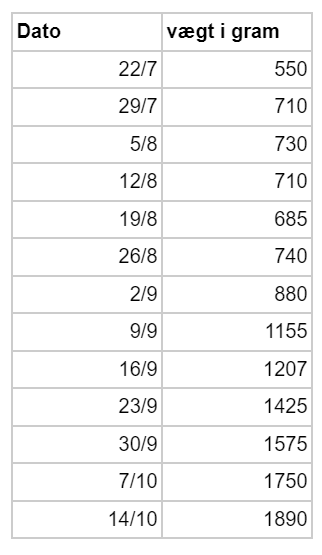






1. Your job is first to visualize the data - maybe just as a scatterplot showing x and y values.

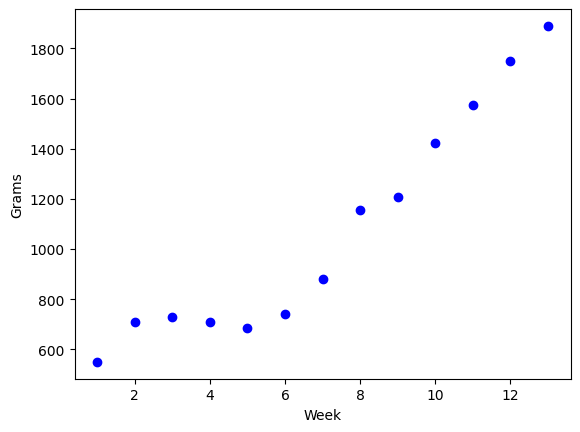

In [27]:
grams = np.array([550,710,730,710,685,740,880,1155,1207,1425,1575,1750,1890])


plt.scatter(range(1, len(grams) + 1), grams, color='blue', label='Weight')
plt.xlabel('Week')
plt.ylabel('Grams')

plt.show()

2. Then you need to put the data into numpy arrays
(hint: use numbers for the dates such as 1, 2, 3 etc, this
represents week 1, week 2 etc).


In [28]:
weeks = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13])

print(np.column_stack((weeks, grams)))

[[   1  550]
 [   2  710]
 [   3  730]
 [   4  710]
 [   5  685]
 [   6  740]
 [   7  880]
 [   8 1155]
 [   9 1207]
 [  10 1425]
 [  11 1575]
 [  12 1750]
 [  13 1890]]



3. Then train a linear model using least squares (and not forcing the model to go through (0,0) as obviously the cat is not 0 grams when it is born in week 0...so you will calculate the week 0 value using the model)


In [29]:
slope, intercept = np.polyfit(weeks, grams, 1)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Slope: 111.12087912087912
Intercept: 299.61538461538476



4. Print the model in the form of y = slope*x + intercept
(so you need to find the slope and intercept values - from the model)


In [30]:
print(f'y={slope}*x+{intercept}')

y=111.12087912087912*x+299.61538461538476



5. Plot the best line as given by least squares in the same plot as the data points.


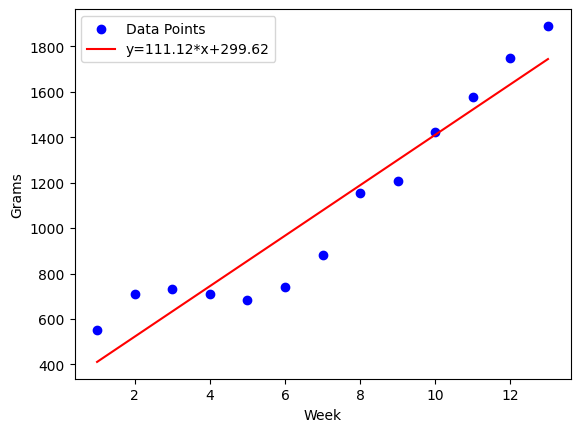

In [31]:
xVals = np.linspace(1, 13, 100)

yVals = slope * xVals + intercept

plt.scatter(weeks, grams, color='blue', label='Data Points')

plt.plot(xVals, yVals, color='red', label=f'y={slope:.2f}*x+{intercept:.2f}')

plt.xlabel('Week')
plt.ylabel('Grams')
plt.legend()

plt.show()


6. Also calculate the SSE value.


In [32]:
SSE = 0

for i in range(0,13):
    SSE += (grams[i]-(slope * i + intercept))**2

print(SSE)

392758.6185243323



7. Calculate the R^2 value to see how close to linear the data is (0 lowest, 1 perfect line)


In [33]:
SST = 0
for gram in grams:
    SST += (gram - grams.mean()) ** 2

RSquared = 1 - (SSE / SST)

print(f"R^2 = {RSquared}")

R^2 = 0.8416005428533818



8. Then use your model to predict the weight of the cat on the date of 28/10 ?

In [34]:
print(slope*15+intercept)

1966.4285714285716


# Exercise 6 (Research part)

This is a more free part, but mandatory.

You can find a sub-topic or a python function that has something to do with linear systems and explore it here.

Or you can go more in-deepth some with of the things already presented in the lectures

Or it could be to find another interesting real-world data and analyse it using GLMS/Least Squares and visualize the results.
(this may require you to learn a little about python pandas - but that is extremely usefull for many things. In fact you used python pandas in one of the exercises - the co2, although the code was given by me)

Explain the use of your topic/function and give some examples in python code.

It does not have to be a big section, but there should be something to write about.

IT SHOULD BE SOMETHING THAT WE DID NOT LOOK AT IN CLASS OR SUBSTANSTIAL EXTENDING SOMETHING WE LOOKED AT AND NOT JUST REPEATING SOMETHING FROM AN EXERCISE. THIS WILL RESULT IN REHANDIN REGARDLESS OF THE REST OF THE HANDIN

Put in relevant references to material (the book or other online ressources) you use or python documentation pages.

# Reviewers
* Maria Wilcken Birkop: AU761816
* Mette Aiwen Thomsen: AU776000 
* Nikolaj Ingemann Lindhart: AU763234